In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#for circular orbits, rv^2 = r^3ω^2 = 4π^2r^3/T^2 = μ = GM
#for elliptic orbits, 4π^2a^3/T^2 = μ (with a expressed in AU; 
#   T in years and M the total mass relative to that of the Sun, we get a^3/T^2 = M)
#for parabolic trajectories, rv^2 is constant and equal to 2μ
#for elliptic and hyperbolic orbits, μ is twice the semi-major axis times the negative of the specific 
#   orbital energy, where the latter is defined as the total energy of the system divided by the reduced mass.
'''
Name	Equatorial
diameter [i]	Mass [i]	Semi-major axis (AU)	Orbital period
(years) [i]	Inclination
to Sun's equator (°)	Orbital
eccentricity	Rotation period
(days)	Confirmed
moons [j]	Axial tilt (°)	Rings	Atmosphere
1.	Mercury	0.382	0.06	0.39	0.24	3.38	0.206	58.64	0	0.04	no	minimal
2.	Venus	0.949	0.82	0.72	0.62	3.86	0.007	−243.02	0	177.36	no	CO2, N2
3.	Earth (a)	1.00	1.00	1.00	1.00	7.25	0.017	1.00	1	23.44	no	N2, O2, Ar
4.	Mars	0.532	0.11	1.52	1.88	5.65	0.093	1.03	2	25.19	no	CO2, N2, Ar
5.	Jupiter	11.209	317.8	5.20	11.86	6.09	0.048	0.41	79	3.13	yes	H2, He
6.	Saturn	9.449	95.2	9.54	29.46	5.51	0.054	0.43	82	26.73	yes	H2, He
7.	Uranus	4.007	14.6	19.22	84.01	6.48	0.047	−0.72	27	97.77	yes	H2, He, CH4
8.	Neptune	3.883	17.2	30.06	164.8	6.43	0.009	0.67	14	28.32	yes	H2, He, CH4
'''
name = ['Mercury','Venus','Earth','Mars','Jupiter','Saturn','Uranus','Neptune']
diameter = [0.382,0.949,1,0.532,11.209,9.449,4.007,3.883]  #relative to earth
mass = [0.06,0.82,1,0.11,317.8,95.2,14.6,17.2]
sma = [0.39,0.72,1,1.52,5.2,9.54,19.22,30.06]  #Semi-major axis (AU)
period =[0.24,0.62,1,1.88,11.86,29.46,84.01,164.8]
df = pd.read_csv('planets.csv')

df.iloc[:,-5:]

,Rotation period(days),Confirmed moons,Axial tilt (°),Rings,Atmosphere
0,58.64,0,0.04,no,minimal
1,-243.02,0,177.36,no,CO2 N2
2,1.00,1,23.44,no,N2 O2 Ar
3,1.03,2,25.19,no,CO2 N2 Ar
4,0.41,79,3.13,yes,H2 He
5,0.43,82,26.73,yes,H2 He
6,-0.72,27,97.77,yes,H2 He CH4
7,0.67,14,28.32,yes,H2 He CH4


In [32]:
df

,Name,Equatorial diameter,Mass,Semi-major axis (AU),Orbital period(years),Inclination to Sun's equator (°),Orbital eccentricity,Rotation period(days),Confirmed moons,Axial tilt (°),Rings,Atmosphere
0,Mercury,0.382,0.06,0.39,0.24,3.38,0.206,58.64,0,0.04,no,minimal
1,Venus,0.949,0.82,0.72,0.62,3.86,0.007,-243.02,0,177.36,no,CO2 N2
2,Earth,1.000,1.00,1.00,1.00,7.25,0.017,1.00,1,23.44,no,N2 O2 Ar
3,Mars,0.532,0.11,1.52,1.88,5.65,0.093,1.03,2,25.19,no,CO2 N2 Ar
4,Jupiter,11.209,317.80,5.20,11.86,6.09,0.048,0.41,79,3.13,yes,H2 He
5,Saturn,9.449,95.20,9.54,29.46,5.51,0.054,0.43,82,26.73,yes,H2 He
6,Uranus,4.007,14.60,19.22,84.01,6.48,0.047,-0.72,27,97.77,yes,H2 He CH4
7,Neptune,3.883,17.20,30.06,164.80,6.43,0.009,0.67,14,28.32,yes,H2 He CH4


In [33]:
df.describe()

,Equatorial diameter,Mass,Semi-major axis (AU),Orbital period(years),Inclination to Sun's equator (°),Orbital eccentricity,Rotation period(days),Confirmed moons,Axial tilt (°)
count,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,3.926375,55.848750,8.456250,36.73375,5.581250,0.060125,-22.695000,25.625000,47.747500
std,4.226738,110.594436,10.842899,59.08263,1.330397,0.065479,91.323794,35.136215,60.340979
min,0.382000,0.060000,0.390000,0.24000,3.380000,0.007000,-243.020000,0.000000,0.040000
25%,0.844750,0.642500,0.930000,0.90500,5.097500,0.015000,0.127500,0.750000,18.362500
50%,2.441500,7.800000,3.360000,6.87000,5.870000,0.047500,0.550000,8.000000,25.960000
75%,5.367500,36.700000,11.960000,43.09750,6.442500,0.063750,1.007500,40.000000,45.682500
max,11.209000,317.800000,30.060000,164.80000,7.250000,0.206000,58.640000,82.000000,177.360000


In [34]:
df.loc[4]
df.iloc[:,4]       #orbital period

0      0.24
1      0.62
2      1.00
3      1.88
4     11.86
5     29.46
6     84.01
7    164.80
Name: Orbital period(years), dtype: float64

In [35]:
#1.32712440042±0.0000000001)×10^20 
GM=1.32712440042*10**20
ua = 149598023e3
GM,ua

(1.32712440042e+20, 149598023000.0)

In [36]:
def orbit_speed(r):  # r in ua
    return np.sqrt(GM/(ua*r))

print(orbit_speed(1)/1000)

29.78467667306086


In [37]:
#Earth 3.986004418±0.000000008)×10^14
gm=3.986004418*10**14
gm

398600441800000.0

In [38]:
#geostationary orbit
h = 42e+6
v=np.sqrt(gm/h)
v/1000

3.080663355435613

In [39]:
#moon orbit
h = 363000e3 #perigee
h = 406000e3 #apogee
v=np.sqrt(gm/h)
v/1000

0.9908453396933944

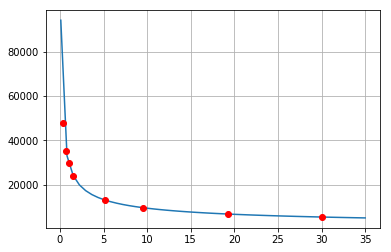

In [40]:
x = np.linspace(0.1,35)
y = orbit_speed(x)
plt.plot(x,y)
for p in sma:
    plt.plot(p,orbit_speed(p),'ro')
plt.grid()
plt.show()

In [41]:
df['Speed m/s']= orbit_speed(df.iloc[:,[3]])
#df = df.drop(columns='Spped')
df

,Name,Equatorial diameter,Mass,Semi-major axis (AU),Orbital period(years),Inclination to Sun's equator (°),Orbital eccentricity,Rotation period(days),Confirmed moons,Axial tilt (°),Rings,Atmosphere,Speed m/s
0,Mercury,0.382,0.06,0.39,0.24,3.38,0.206,58.64,0,0.04,no,minimal,47693.652873
1,Venus,0.949,0.82,0.72,0.62,3.86,0.007,-243.02,0,177.36,no,CO2 N2,35101.578085
2,Earth,1.000,1.00,1.00,1.00,7.25,0.017,1.00,1,23.44,no,N2 O2 Ar,29784.676673
3,Mars,0.532,0.11,1.52,1.88,5.65,0.093,1.03,2,25.19,no,CO2 N2 Ar,24158.562889
4,Jupiter,11.209,317.80,5.20,11.86,6.09,0.048,0.41,79,3.13,yes,H2 He,13061.444764
5,Saturn,9.449,95.20,9.54,29.46,5.51,0.054,0.43,82,26.73,yes,H2 He,9643.145122
6,Uranus,4.007,14.60,19.22,84.01,6.48,0.047,-0.72,27,97.77,yes,H2 He CH4,6793.853823
7,Neptune,3.883,17.20,30.06,164.80,6.43,0.009,0.67,14,28.32,yes,H2 He CH4,5432.483324


In [42]:
df.describe()

,Equatorial diameter,Mass,Semi-major axis (AU),Orbital period(years),Inclination to Sun's equator (°),Orbital eccentricity,Rotation period(days),Confirmed moons,Axial tilt (°),Speed m/s
count,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,3.926375,55.848750,8.456250,36.73375,5.581250,0.060125,-22.695000,25.625000,47.747500,21458.674694
std,4.226738,110.594436,10.842899,59.08263,1.330397,0.065479,91.323794,35.136215,60.340979,15273.836588
min,0.382000,0.060000,0.390000,0.24000,3.380000,0.007000,-243.020000,0.000000,0.040000,5432.483324
25%,0.844750,0.642500,0.930000,0.90500,5.097500,0.015000,0.127500,0.750000,18.362500,8930.822298
50%,2.441500,7.800000,3.360000,6.87000,5.870000,0.047500,0.550000,8.000000,25.960000,18610.003827
75%,5.367500,36.700000,11.960000,43.09750,6.442500,0.063750,1.007500,40.000000,45.682500,31113.902026
max,11.209000,317.800000,30.060000,164.80000,7.250000,0.206000,58.640000,82.000000,177.360000,47693.652873


In [ ]:
# galaxie
c = 299792458  # vitesse lumière en m/s
al= 9.461e15  # année-lumière en m
R = 26000   # distance soleil centre galactique en al
k = 150e9  # masse noyau galactique

def galactic_orbit_speed(r):  # r in al
    return np.sqrt(GM*k/(al*r))

In [63]:
v_galactique = galactic_orbit_speed(R)
print(v_galactique,'m/s',v_galactique/1000,'km/s')
beta = v_galactique/c
print(beta)
gamma = 1/(np.sqrt(1-beta**2) )
print(gamma)

284476.4052245439 m/s 284.4764052245439 km/s
0.0009489111471394783
1.0000004502164865


In [58]:
v=v_galactique*3600/1000/1e6
v,'millions de km/h'

(1.0241150588083578, 'millions de km/h')

In [45]:
df.iloc[:,-2:]

,Atmosphere,Speed m/s
0,minimal,47693.652873
1,CO2 N2,35101.578085
2,N2 O2 Ar,29784.676673
3,CO2 N2 Ar,24158.562889
4,H2 He,13061.444764
5,H2 He,9643.145122
6,H2 He CH4,6793.853823
7,H2 He CH4,5432.483324


In [50]:
vo=df['Speed m/s']*3600/1000
(df['Name'],vo)

(0    Mercury
 1      Venus
 2     Earth 
 3       Mars
 4    Jupiter
 5     Saturn
 6     Uranus
 7    Neptune
 Name: Name, dtype: object, 0    171697.150344
 1    126365.681106
 2    107224.836023
 3     86970.826401
 4     47021.201151
 5     34715.322441
 6     24457.873762
 7     19556.939967
 Name: Speed m/s, dtype: float64)